In [1]:
import sys
import xarray as xr
import numpy as np
from datetime import timedelta
from glob import glob
import cftime
import os


In [2]:
filename= "/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/tas_3hr_CanESM5_historical_r1i1p2f1_gn_201101010300-201501010000.nc"
ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)

/tmp/ipykernel_24350/2254045827.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)
/tmp/ipykernel_24350/2254045827.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)


In [3]:
rsds_filename="/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_3hr_CanESM5_historical_r1i1p2f1_gn_201101010130-201412312230.nc"
ds_rsds=xr.open_dataset(rsds_filename,decode_times=True,use_cftime=True)

/tmp/ipykernel_24350/119887333.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_rsds=xr.open_dataset(rsds_filename,decode_times=True,use_cftime=True)


In [4]:
rsdsdiff_filename= "/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsdsdiff_3hr_CanESM5_historical_r1i1p2f1_gn_201101010130-201412312230.nc"
ds_rsdsdiff=xr.open_dataset(rsdsdiff_filename,decode_times=True,use_cftime=True)

/tmp/ipykernel_24350/2307539688.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_rsdsdiff=xr.open_dataset(rsdsdiff_filename,decode_times=True,use_cftime=True)


In [5]:
# Extract the time coordinates
tas_time = ds_tas['time']
rsds_time = ds_rsds['time']
print("tas_time values:", tas_time.values)
print("rsds_time values:", rsds_time.values)

tas_time values: [cftime.DatetimeNoLeap(2011, 1, 1, 3, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 9, 0, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2014, 12, 31, 18, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 21, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
rsds_time values: [cftime.DatetimeNoLeap(2011, 1, 1, 1, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 4, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2011, 1, 1, 7, 30, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2014, 12, 31, 16, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 19, 30, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2014, 12, 31, 22, 30, 0, 0, has_year_zero=True)]


In [ ]:
# Convert cftime time in tas to datetime64 (if needed)
#if not np.issubdtype(ds_tas['time'].dtype, np.datetime64):
    #ds_tas = ds_tas.assign_coords(time=ds_tas.indexes['time'].to_datetimeindex())

/tmp/ipykernel_9791/3833544051.py:3: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  ds_tas = ds_tas.assign_coords(time=ds_tas.indexes['time'].to_datetimeindex())


In [8]:
ds_tas

<xarray.Dataset> Size: 383MB
Dimensions:    (time: 11680, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 93kB 2011-01-01 03:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 187kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    tas        (time, lat, lon) float32 383MB ...
Attributes: (12/53)
    CCCma_model_hash:            d818abd2859be0df409ff0a74318bf4c10e9c3ca
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           543b56ca5b6d5ef8fea18515faacc27c8ec6faf3
    CCCma_runid:                 p2-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/6b2b8b08-c5a7-435a-aeb8-bf5fa96...
    variable_id:                 tas
    variant_label:               r1i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.5.0

In [9]:
ds_rsds

<xarray.Dataset> Size: 383MB
Dimensions:    (time: 11680, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 93kB 2011-01-01 01:30:00 ... 2014-12-31 22:30:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 187kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    rsds       (time, lat, lon) float32 383MB ...
Attributes: (12/53)
    CCCma_model_hash:            d818abd2859be0df409ff0a74318bf4c10e9c3ca
    CCCma_parent_runid:          p2-pictrl
    CCCma_pycmor_hash:           543b56ca5b6d5ef8fea18515faacc27c8ec6faf3
    CCCma_runid:                 p2-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/d7e35d64-152a-407b-a586-6e18b43...
    variable_id:                 rsds
    variant_label:               r1i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.5.0

In [62]:
from future_wind_copy import combine_hemispheres
tas_europe=combine_hemispheres(ds_tas,minlat=20.,maxlat=75.,minlon=330.,maxlon=50.)
rsds_europe=combine_hemispheres(ds_rsds,minlat=20.,maxlat=75.,minlon=330.,maxlon=50.)
rsdsdiff_europe=combine_hemispheres(ds_rsdsdiff,minlat=20.,maxlat=75.,minlon=330.,maxlon=50.)

In [63]:
tas_europe
min_tas=tas_europe['tas'].min()
print("min_tas:", min_tas)
max_tas=tas_europe['tas'].max()
print("max_tas:", max_tas)


min_tas: <xarray.DataArray 'tas' ()> Size: 8B
array(217.06228638)
Coordinates:
    height   float64 8B 2.0
max_tas: <xarray.DataArray 'tas' ()> Size: 8B
array(328.83044434)
Coordinates:
    height   float64 8B 2.0


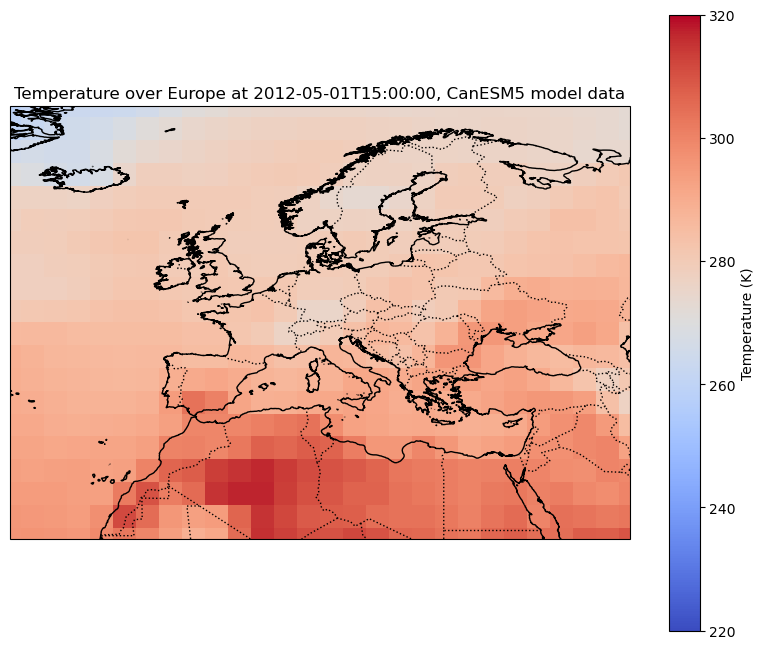

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

tas_europe_var = tas_europe['tas']

# Select solar irradiance for the specific time
specific_time = "2012-05-01T15:00:00"
tas_europe_at_time = tas_europe_var.sel(time=specific_time)

# Get coordinate limits from the dataset
lon_min, lon_max = tas_europe_at_time.lon.min().item(), tas_europe_at_time.lon.max().item()
lat_min, lat_max = tas_europe_at_time.lat.min().item(), tas_europe_at_time.lat.max().item()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
tas_europe_at_time.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', 
    vmin=220,  # Minimum value of the color scale
    vmax=320, # Red color scale for solar irradiance
    cbar_kwargs={'label': 'Temperature (K)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent dynamically based on dataset coordinates
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Temperature over Europe at {specific_time}, CanESM5 model data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [65]:
# Interpolate tas to match rsds time
tas_interp = tas_europe['tas'].interp(time=ds_rsds['time'], method="linear")


In [66]:
print(tas_interp.shape)
tas_interp

(11680, 20, 28)


<xarray.DataArray 'tas' (time: 11680, lat: 20, lon: 28)> Size: 52MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[294.41537476, 294.03083801, 293.13200378, ..., 281.25857544,
         273.18904114, 279.62272644],
        [294.50273132, 294.19885254, 293.62979126, ..., 277.25186157,
         274.29211426, 277.38816833],
        [294.31455994, 293.84326172, 293.65797424, ..., 274.75224304,
         270.0554657 , 278.82453918],
...
        [266.02459717, 268.00788879, 269.83811951, ..., 270.54754639,
         268.18188477, 267.53797913],
        [248.85942078, 253.60413361, 257.0647049 , ..., 273.42697144,
         273.13609314, 272.52526855],
        [239.9691925 , 243.30417633, 248.18218994, ..., 274.34461975,
         274.01420593, 273.58633423]],

       [[295.45491028, 294.93244934, 294.02908325, ..., 285.03674316,
         280.55079651, 283.80636597],
        [295.25656128, 294.80673218, 294.05691528, ..., 280.60096741,
         276.25091553, 278.99534607],
        [295.0274353 , 294.63163757, 294.14221191, ..., 273.79647827,
         274.17253113, 279.28979492],
        ...,
        [267.41996765, 269.3432312 , 270.7171936 , ..., 270.65750122,
         268.14616394, 267.47438049],
        [252.35843658, 257.09132385, 260.69927979, ..., 273.47203064,
         273.11579895, 272.49417114],
        [240.12500763, 243.58265686, 248.45764923, ..., 274.31382751,
         274.03225708, 273.62930298]]], shape=(11680, 20, 28))
Coordinates:
  * lat      (lat) float64 160B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * lon      (lon) float64 224B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
    height   float64 8B 2.0
  * time     (time) object 93kB 2011-01-01 01:30:00 ... 2014-12-31 22:30:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        sampled, CMIP_table_comment: near-surface (usually, 2 met...
    units:          K
    original_name:  ST
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2020-02-14T18:06:24Z altered by CMOR: Treated scalar dime...

In [67]:
# Create a mask for the NaN values using .isnull()
nan_mask = tas_interp.isnull()

# For each time step, replace NaNs with the values from the next time step
for t in range(len(tas_interp.time) - 1):  # Exclude the last time step
    # Use .isel() to ensure the correct alignment of coordinates
    tas_interp[t] = tas_interp[t].where(~nan_mask[t], tas_interp.isel(time=t + 1))

In [68]:
print(tas_interp.dims)
print(tas_interp.shape)

('time', 'lat', 'lon')
(11680, 20, 28)


In [69]:
# Define a smaller time range (first 3 months of 1980)
time_subset = slice("1012-01-01", "2012-03-31")

# Subset the datasets
tas_subset = tas_europe['tas'].sel(time=time_subset)
tas_interp_subset = tas_interp.sel(time=time_subset)

# Select a single location for comparison
lat_sel = ds_tas['lat'].values[len(tas_europe['lat']) // 2]
lon_sel = ds_tas['lon'].values[len(tas_europe['lon']) // 2]

tas_original = tas_subset.sel(lat=lat_sel, lon=lon_sel, method='nearest')
tas_interp_plot = tas_interp_subset.sel(lat=lat_sel, lon=lon_sel, method='nearest')
tas_original





<xarray.DataArray 'tas' (time: 3639)> Size: 15kB
array([293.80856, 294.06262, 298.46848, ..., 305.09552, 300.29037,
       299.58325], shape=(3639,), dtype=float32)
Coordinates:
  * time     (time) object 29kB 2011-01-01 03:00:00 ... 2012-03-31 21:00:00
    lat      float64 8B 20.93
    lon      float64 8B 39.38
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        sampled, CMIP_table_comment: near-surface (usually, 2 met...
    units:          K
    original_name:  ST
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2020-02-14T18:06:24Z altered by CMOR: Treated scalar dime...

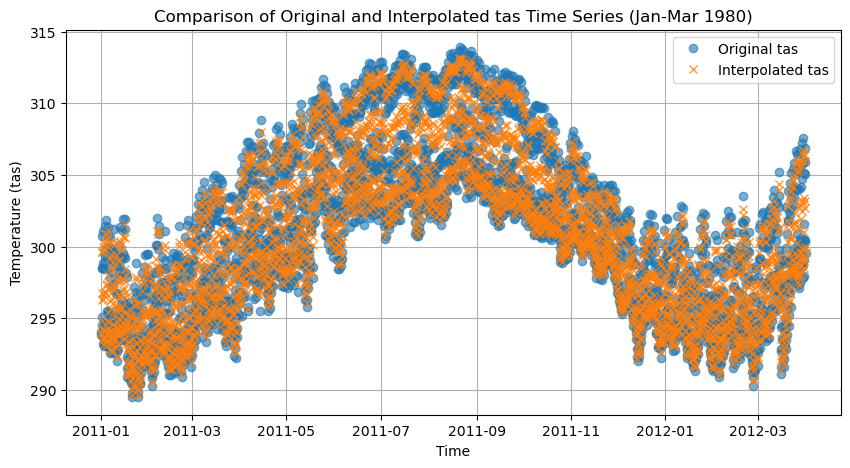

In [70]:

# Convert cftime to datetime64 for plotting
tas_original_time = tas_original['time'].values.astype('datetime64[ns]')
tas_interp_plot_time = tas_interp_plot['time'].values.astype('datetime64[ns]')# Plot
# Plot
plt.figure(figsize=(10, 5))
plt.plot(tas_original_time, tas_original, 'o', label='Original tas', alpha=0.6)
plt.plot(tas_interp_plot_time, tas_interp_plot, 'x', label='Interpolated tas', alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Temperature (tas)')
plt.title('Comparison of Original and Interpolated tas Time Series (Jan-Mar 1980)')
plt.legend()
plt.grid()
plt.show()

In [71]:
# Check if lat and lon coordinates are the same
lat_match = (tas_europe['lat'].values == rsds_europe['lat'].values).all()
lon_match = (tas_europe['lon'].values == rsds_europe['lon'].values).all()

if lat_match and lon_match:
    print("✅ `tas` and `rsds` have the same spatial coordinates.")
else:
    print("⚠️ WARNING: `tas` and `rsds` have different spatial coordinates!")


✅ `tas` and `rsds` have the same spatial coordinates.


In [72]:
tas_interp

<xarray.DataArray 'tas' (time: 11680, lat: 20, lon: 28)> Size: 52MB
array([[[294.41537476, 294.03083801, 293.13200378, ..., 281.25857544,
         273.18904114, 279.62272644],
        [294.50273132, 294.19885254, 293.62979126, ..., 277.25186157,
         274.29211426, 277.38816833],
        [294.31455994, 293.84326172, 293.65797424, ..., 274.75224304,
         270.0554657 , 278.82453918],
        ...,
        [271.80804443, 273.91931152, 274.73718262, ..., 267.81736755,
         265.81646729, 264.42779541],
        [260.36343384, 261.32626343, 261.03970337, ..., 271.36407471,
         269.79493713, 266.63557434],
        [253.87006378, 252.72290802, 251.93476105, ..., 269.58830261,
         268.77227783, 267.27818298]],

       [[294.41537476, 294.03083801, 293.13200378, ..., 281.25857544,
         273.18904114, 279.62272644],
        [294.50273132, 294.19885254, 293.62979126, ..., 277.25186157,
         274.29211426, 277.38816833],
        [294.31455994, 293.84326172, 293.65797424, ..., 274.75224304,
         270.0554657 , 278.82453918],
...
        [266.02459717, 268.00788879, 269.83811951, ..., 270.54754639,
         268.18188477, 267.53797913],
        [248.85942078, 253.60413361, 257.0647049 , ..., 273.42697144,
         273.13609314, 272.52526855],
        [239.9691925 , 243.30417633, 248.18218994, ..., 274.34461975,
         274.01420593, 273.58633423]],

       [[295.45491028, 294.93244934, 294.02908325, ..., 285.03674316,
         280.55079651, 283.80636597],
        [295.25656128, 294.80673218, 294.05691528, ..., 280.60096741,
         276.25091553, 278.99534607],
        [295.0274353 , 294.63163757, 294.14221191, ..., 273.79647827,
         274.17253113, 279.28979492],
        ...,
        [267.41996765, 269.3432312 , 270.7171936 , ..., 270.65750122,
         268.14616394, 267.47438049],
        [252.35843658, 257.09132385, 260.69927979, ..., 273.47203064,
         273.11579895, 272.49417114],
        [240.12500763, 243.58265686, 248.45764923, ..., 274.31382751,
         274.03225708, 273.62930298]]], shape=(11680, 20, 28))
Coordinates:
  * lat      (lat) float64 160B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * lon      (lon) float64 224B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
    height   float64 8B 2.0
  * time     (time) object 93kB 2011-01-01 01:30:00 ... 2014-12-31 22:30:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        sampled, CMIP_table_comment: near-surface (usually, 2 met...
    units:          K
    original_name:  ST
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2020-02-14T18:06:24Z altered by CMOR: Treated scalar dime...

In [73]:
print(tas_interp.shape)  # Check the shape of interpolated data
print(ds_rsds['time'].shape)  # Check the shape of the target time coordinate
print(tas_europe['lat'].shape)  # Check the shape of lat coordinates
print(tas_europe['lon'].shape)  # Check the shape of lon coordinates

(11680, 20, 28)
(11680,)
(20,)
(28,)


In [74]:
from datetime import datetime,timedelta
def make_data_set(du,rsds,rsdsdiff,tas):
    """Creates xarray DataArray for netCDF write

    Args:
        du (dataset): sample dataset with attributes
        rsds (DataArray): wind speed 
        rsdsdiff (DataArray): wind direction
        tas (DataArray): surface air density

    Returns:
        xarray DataArray: DataArray for write
    """
    lat = xr.DataArray(
        data=rsds.lat.values.astype('float32'),
        dims=["lat"],
        coords=dict(
            lat=(["lat"], rsds.lat.values)
        ),
        attrs=dict(
        long_name="latitude",
        units="degrees_north",
        axis="Y"
        ),
    )
    lon = xr.DataArray(
        data=rsds.lon.values.astype('float32'),
        dims="lon",
        coords=dict(
            lon=(["lon"], rsds.lon.values)
        ),
        attrs=dict(
        long_name="longitude",
        units="degrees_east",
        axis="X"
        ),
    )
    
    ds = xr.Dataset(
        data_vars=dict(
            rsds = (
                ["time","lat","lon"],rsds.values.astype('float32'),
                dict(long_name = "rsds",
                units = "W/m2")),
            rsdsdiff = (
                ["time","lat","lon"],rsdsdiff.values.astype('float32'),
                dict(long_name = "rsdsdiff",
                units = "W/m2",
                vert_units = "W/m2")),
            tas = (
                ["time","lat","lon"],tas.values.astype('float32'),
                dict(long_name = "surface air density",
                units = "K",
                height = "surface")),
            ),
        coords=dict(
            lon=lon,
            lat=lat,
            time=rsds.time
            ),
        attrs=dict(
            data_source = "Processed data from CMIP6 runs",
            experiment = du.experiment_id,
            source = du.source_id,
            variant_label = du.variant_label,
            data_written = datetime.now().strftime("%d/%m/%Y %H:%M")
            )
    )   
    return ds

In [75]:
rsds_data = rsds_europe['rsds']
rsdsdiff_data = rsdsdiff_europe['rsdsdiff']
tas_data = tas_interp
rsds_europe
print(rsds_data.shape)
print(rsdsdiff_data.shape)
print(tas_data.shape)
ds=make_data_set(ds_tas,rsds_data,rsdsdiff_data,tas_data)
ds

(11680, 20, 28)
(11680, 20, 28)
(11680, 20, 28)


<xarray.Dataset> Size: 79MB
Dimensions:   (time: 11680, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 93kB 2011-01-01 01:30:00 ... 2014-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 26MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    rsdsdiff  (time, lat, lon) float32 26MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tas       (time, lat, lon) float32 26MB 294.4 294.0 293.1 ... 274.0 273.6
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   03/03/2025 14:14

In [ ]:
import sys
experiment = sys.argv[1]
if (experiment == "historical"):
        year = 1980; last_year = 2014
else:
    year = 2015; last_year = 2100

In [77]:
# Ensure combined_dataset is defined and has a 'time' dimension
if 'time' in ds.dims:
    unique_years = np.unique(ds.time.dt.year.values)
    
    for year in unique_years:
        # Extract data for this year using slicing
        yearly_data = ds.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))
        
        # Check if yearly_data is not empty
        if yearly_data.time.size > 0:
            # Save as .nc file
            yearly_data.to_netcdf(f"/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_{year}.nc")
        else:
            print(f"No data available for the year {year}")
else:
    print("The dataset does not contain a 'time' dimension.")

In [79]:
ds_after=xr.open_dataset("/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_2012.nc")
ds_after

<xarray.Dataset> Size: 20MB
Dimensions:   (time: 2920, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 23kB 2012-01-01 01:30:00 ... 2012-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 7MB ...
    rsdsdiff  (time, lat, lon) float32 7MB ...
    tas       (time, lat, lon) float32 7MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   03/03/2025 14:14

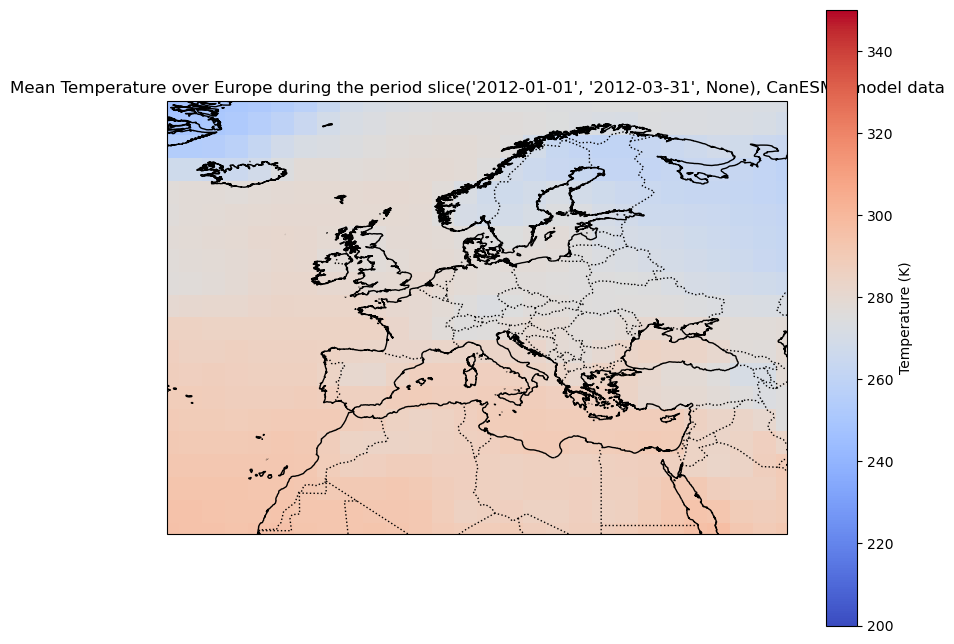

In [80]:
# Select solar irradiance for the specific time
# Define a smaller time range (first 3 months of 1980)
time_subset = slice("2012-01-01", "2012-03-31")

# Subset the datasets
tas_subset = ds_after['tas'].sel(time=time_subset)
tas_avg_time = tas_subset.mean(dim='time')


# Get coordinate limits from the dataset
lon_min, lon_max = ds_after.lon.min().item(), ds_after.lon.max().item()
lat_min, lat_max = ds_after.lat.min().item(), ds_after.lat.max().item()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
tas_avg_time.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', 
    vmin=200,  # Minimum value of the color scale
    vmax=350, # Red color scale for solar irradiance
    cbar_kwargs={'label': 'Temperature (K)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent dynamically based on dataset coordinates
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Mean Temperature over Europe during the period {time_subset}, CanESM5 model data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [81]:
ds_wind=xr.open_dataset("/groups/FutureWind/AllEurope/CanESM5/historical/r1i1p2f1/wspd_wdir_2012.nc")
ds_wind

<xarray.Dataset> Size: 23MB
Dimensions:         (time: 1460, level: 3, lat: 20, lon: 28)
Coordinates:
  * lon             (lon) float32 112B -28.12 -25.31 -22.5 ... 42.19 45.0 47.81
  * lat             (lat) float32 80B 20.93 23.72 26.51 ... 68.37 71.16 73.95
  * level           (level) float32 12B 50.0 100.0 200.0
  * time            (time) object 12kB 2012-01-01 00:00:00 ... 2012-12-31 18:...
Data variables:
    wind_speed      (time, level, lat, lon) float32 10MB ...
    wind_direction  (time, level, lat, lon) float32 10MB ...
    air_density     (time, lat, lon) float32 3MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   16/05/2022 14:34

In [82]:
ds_after

<xarray.Dataset> Size: 20MB
Dimensions:   (time: 2920, lat: 20, lon: 28)
Coordinates:
  * lon       (lon) float32 112B -28.12 -25.31 -22.5 -19.69 ... 42.19 45.0 47.81
  * lat       (lat) float32 80B 20.93 23.72 26.51 29.3 ... 68.37 71.16 73.95
  * time      (time) object 23kB 2012-01-01 01:30:00 ... 2012-12-31 22:30:00
Data variables:
    rsds      (time, lat, lon) float32 7MB ...
    rsdsdiff  (time, lat, lon) float32 7MB ...
    tas       (time, lat, lon) float32 7MB ...
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         CanESM5
    variant_label:  r1i1p2f1
    data_written:   03/03/2025 14:14